In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.7_.65_.6_.55_.5__.5_.8',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.7_.65_.6_.55_.5__.5_.8',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 200.

temperature_reference_1 = 250.

pressure_reference_2 = 1.

temperature_reference_2 = 250.

ighigh = 5

ng = 7

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /.7, .65, .6, .55, .5, .5, .8/

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

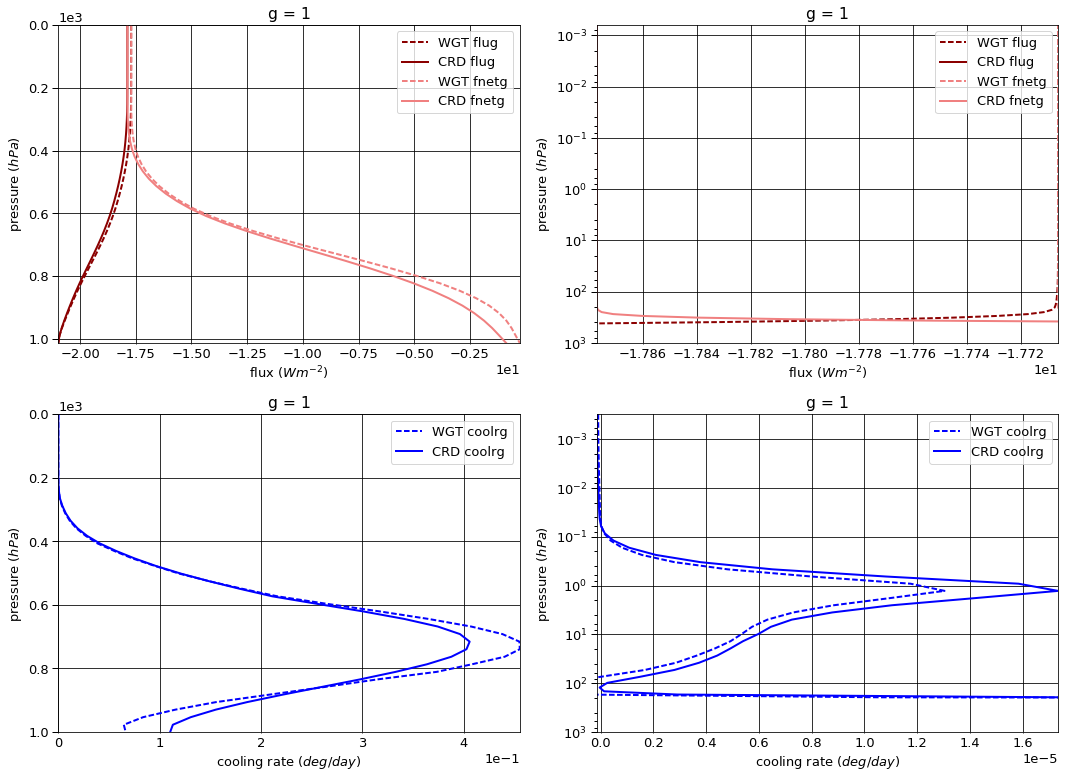

# Figure: flux, cooling rate g-group 2

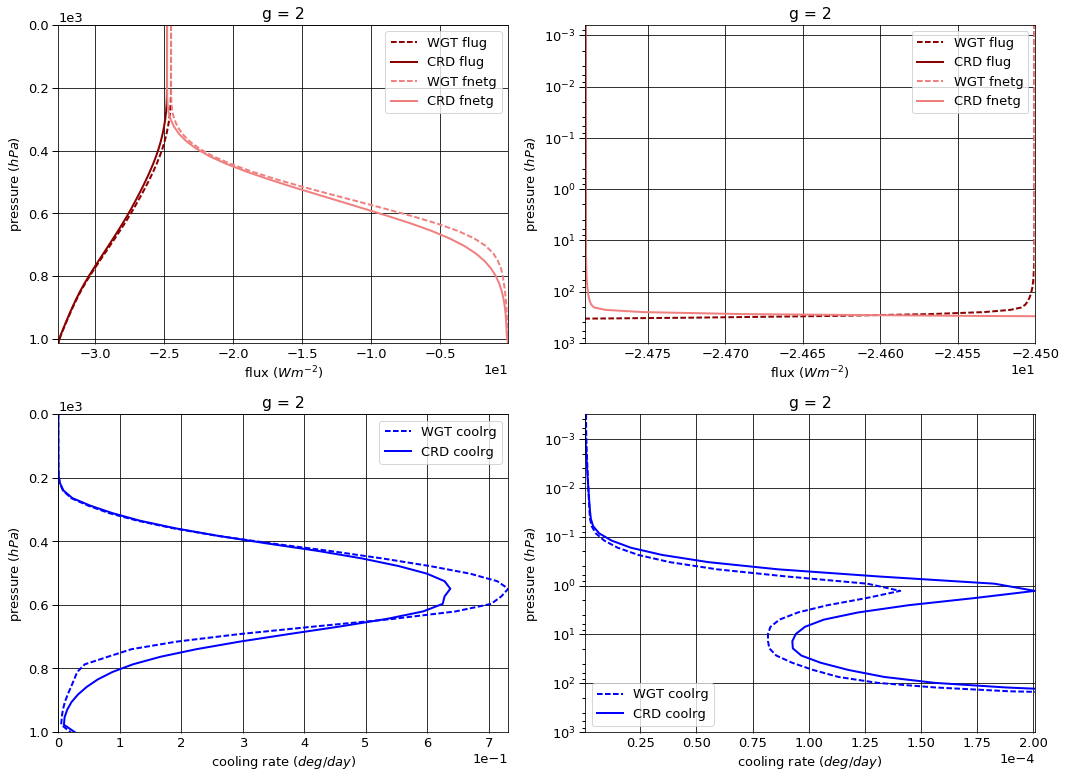

# Figure: flux, cooling rate g-group 3

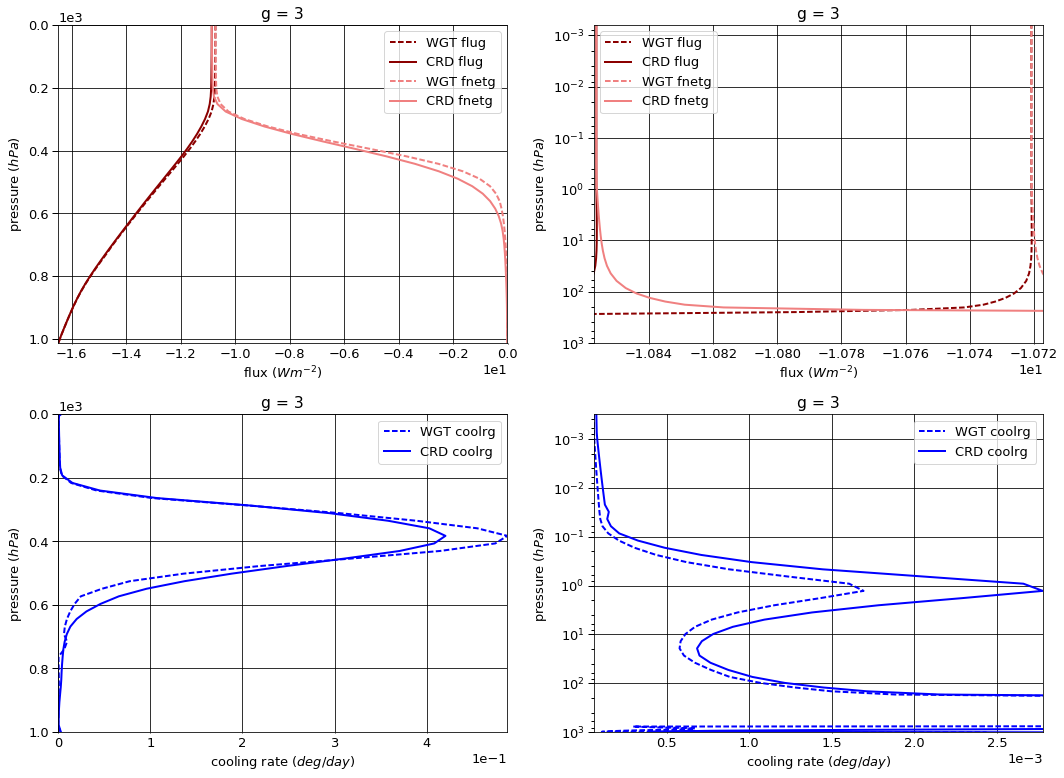

# Figure: flux, cooling rate g-group 4

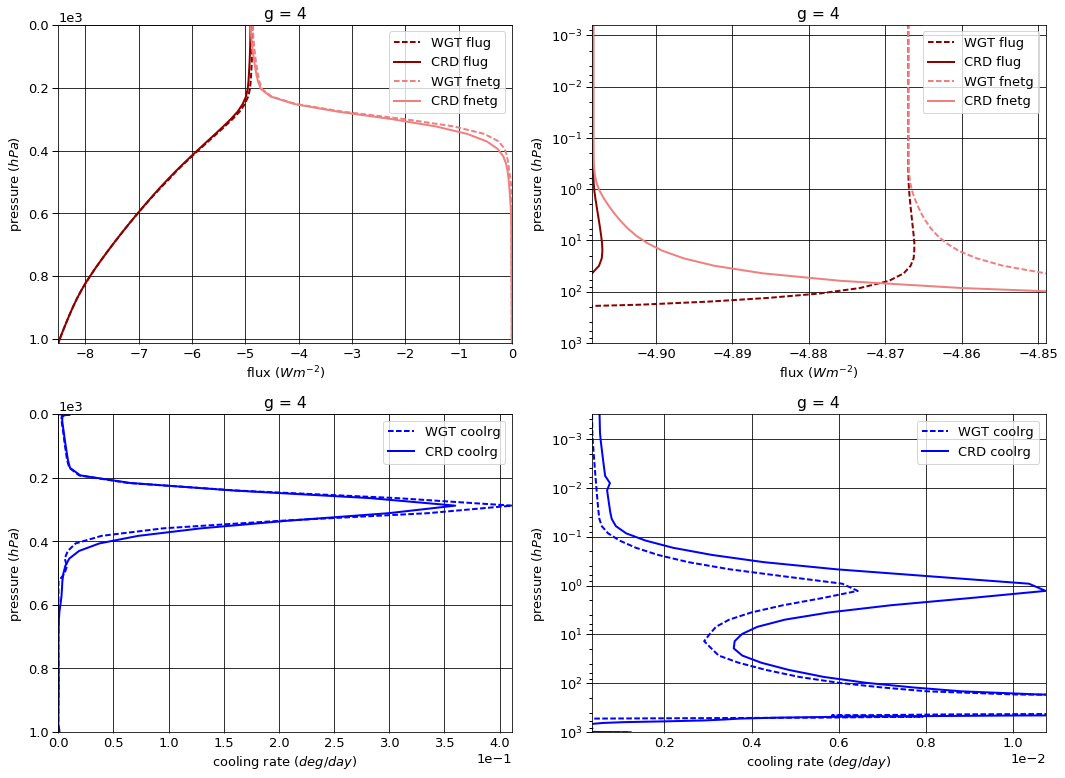

# Figure: flux, cooling rate g-group 5

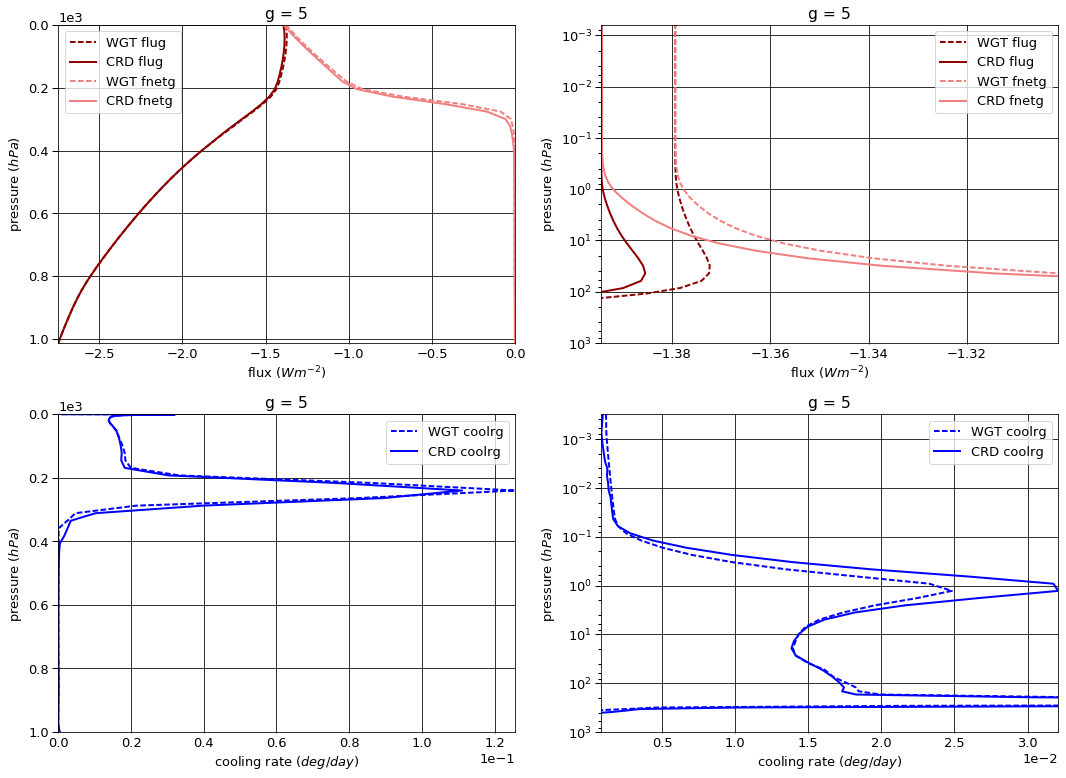

# Figure: flux, cooling rate g-group 6

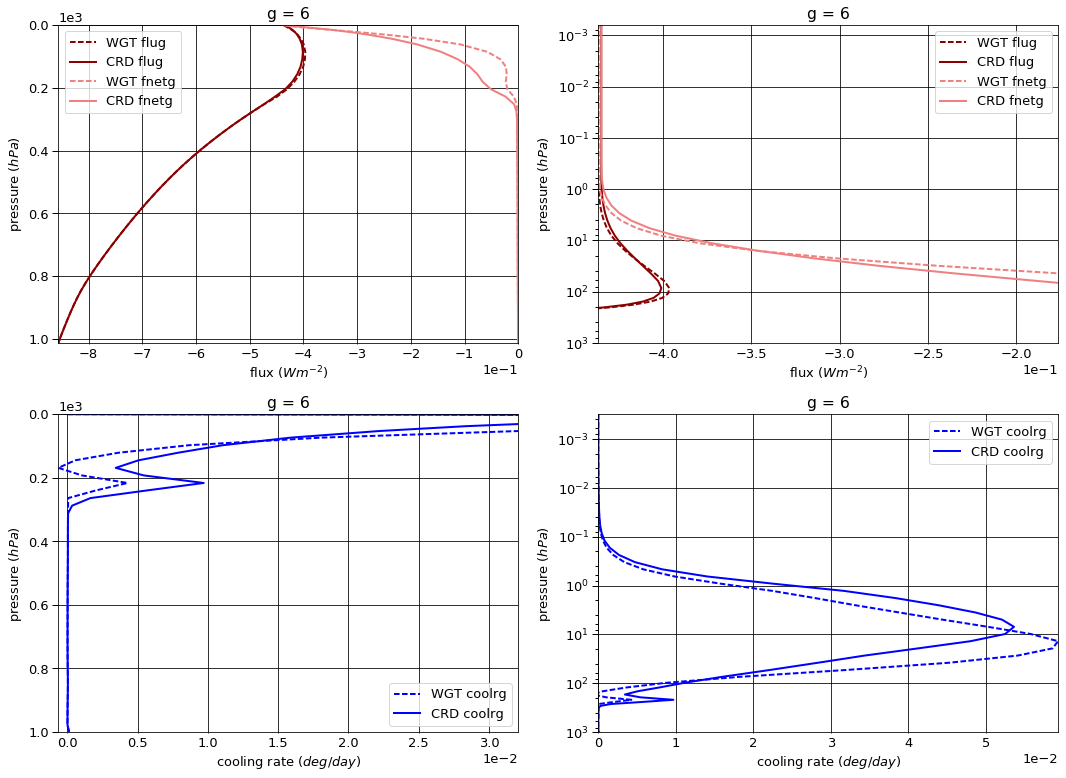

# Figure: flux, cooling rate g-group 7

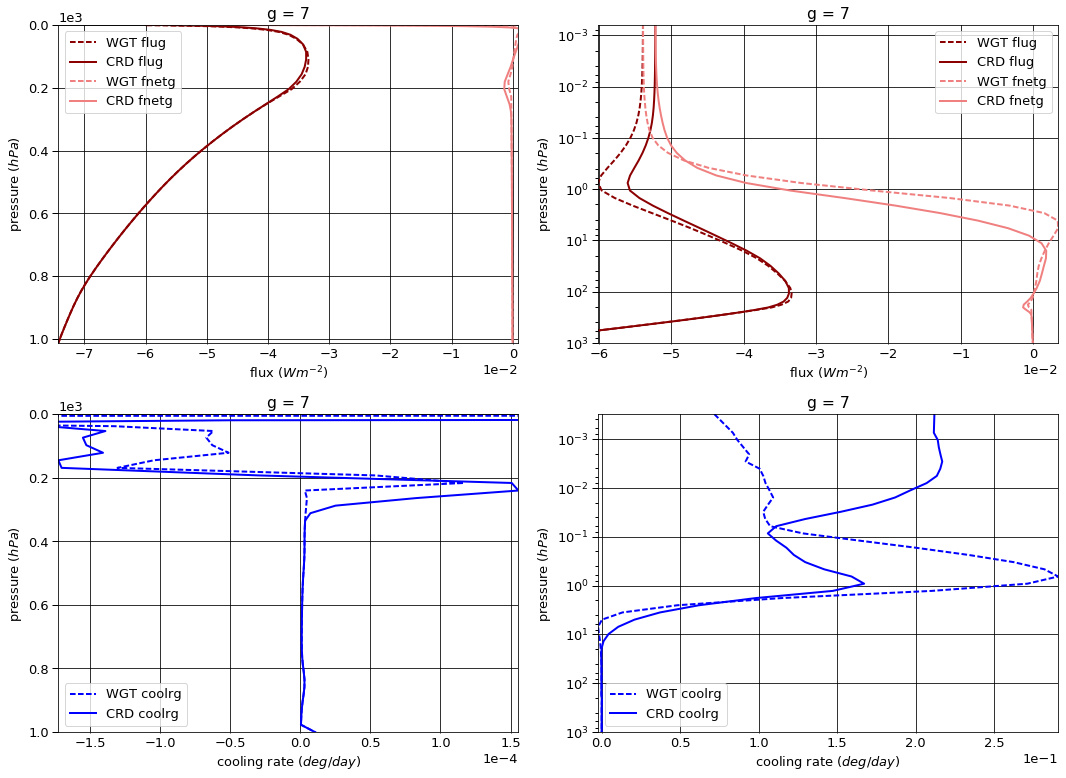

# Figure: flux, cooling rate g-group total

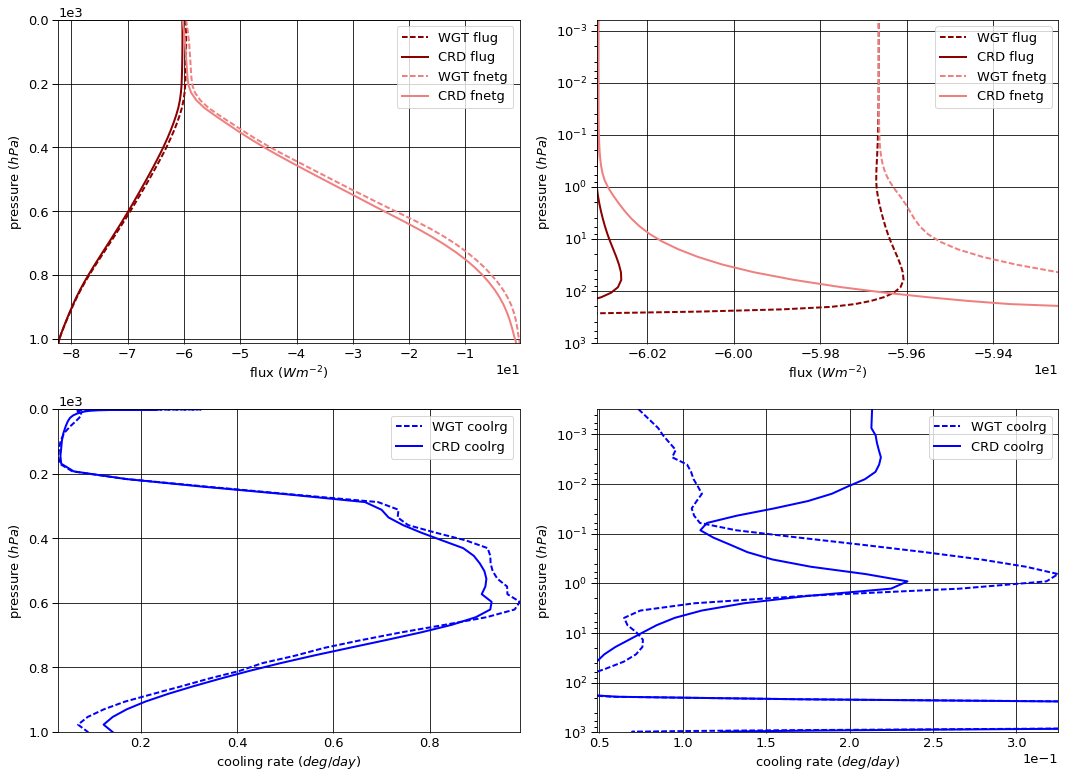

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -17.876971   0.000000 -17.876971
  1013.0   76    -20.975478  20.101309  -0.874169
2 0.0      1     -24.790056   0.000000 -24.790056
  1013.0   76    -32.673260  32.594424  -0.078836
3 0.0      1     -10.856452   0.000000 -10.856452
  1013.0   76    -16.484482  16.476455  -0.008027
4 0.0      1      -4.908218   0.000000  -4.908218
  1013.0   76     -8.507930   8.504533  -0.003397
5 0.0      1      -1.394285   0.000000  -1.394285
  1013.0   76     -2.744258   2.743157  -0.001101
6 0.0      1      -0.435113   0.000000  -0.435113
  1013.0   76     -0.856180   0.855845  -0.000335
7 0.0      1      -0.052216   0.000000  -0.052216
  1013.0   76     -0.074241   0.074211  -0.000030


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -17.706140   0.000000 -17.706140
  1013.0   76    -20.975569  20.712442  -0.263126
2 0.0      1     -24.500568   0.000000 -24.500568
  1013.0   76    -32.672776  32.620590  -0.052186
3 0.0      1     -10.720730   0.000000 -10.720730
  1013.0   76    -16.484772  16.478023  -0.006749
4 0.0      1      -4.866978   0.000000  -4.866978
  1013.0   76     -8.507969   8.504572  -0.003397
5 0.0      1      -1.379333   0.000000  -1.379333
  1013.0   76     -2.744245   2.743144  -0.001101
6 0.0      1      -0.436795   0.000000  -0.436795
  1013.0   76     -0.856217   0.855882  -0.000335
7 0.0      1      -0.053916   0.000000  -0.053916
  1013.0   76     -0.074247   0.074217  -0.000030


WGT - CRD


flug      fldg         fnetg
g pressure level                                  
1 0.0      1      0.170831  0.000000  1.708310e-01
  1013.0   76    -0.000091  0.611133  6.110427e-01
2 0.0      1      0.289488  0.000000  2.894880e-01
  1013.0   76     0.000484  0.026166  2.665007e-02
3 0.0      1      0.135722  0.000000  1.357220e-01
  1013.0   76    -0.000290  0.001568  1.278415e-03
4 0.0      1      0.041240  0.000000  4.123980e-02
  1013.0   76    -0.000039  0.000039 -2.900000e-08
5 0.0      1      0.014951  0.000000  1.495130e-02
  1013.0   76     0.000012 -0.000013 -2.420000e-08
6 0.0      1     -0.001683  0.000000 -1.682610e-03
  1013.0   76    -0.000037  0.000037 -3.966000e-08
7 0.0      1     -0.001701  0.000000 -1.700707e-03
  1013.0   76    -0.000006  0.000006 -4.845000e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.497176e-07
  1001.112500 75     1.102318e-01
2 0.000312    1      4.121678e-07
  1001.112500 75     2.722757e-02
3 0.000312    1      7.352178e-05
  1001.112500 75     2.960033e-03
4 0.000312    1      5.121943e-04
  1001.112500 75     1.227217e-03
5 0.000312    1      9.576950e-04
  1001.112500 75     3.978340e-04
6 0.000312    1      1.056262e-05
  1001.112500 75     1.210368e-04
7 0.000312    1      2.119588e-01
  1001.112500 75     1.078347e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1     -9.073359e-08
  1001.112500 75     6.648420e-02
2 0.000312    1      8.481598e-07
  1001.112500 75     2.025091e-02
3 0.000312    1      5.748136e-05
  1001.112500 75     2.437843e-03
4 0.000312    1      3.400536e-04
  1001.112500 75     1.227228e-03
5 0.000312    1      1.175158e-03
  1001.112500 75     3.978427e-04
6 0.000312    1      9.041652e-06
  1001.112500 75     1.210511e-04
7 0.000312    1      7.179477e-02
  1001.112500 75     1.078521e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      5.898405e-08
  1001.112500 75    -4.374761e-02
2 0.000312    1      4.359920e-07
  1001.112500 75    -6.976662e-03
3 0.000312    1     -1.604042e-05
  1001.112500 75    -5.221898e-04
4 0.000312    1     -1.721407e-04
  1001.112500 75     1.050000e-08
5 0.000312    1      2.174631e-04
  1001.112500 75     8.670000e-09
6 0.000312    1     -1.520967e-06
  1001.112500 75     1.428000e-08
7 0.000312    1     -1.401640e-01
  1001.112500 75     1.746000e-09

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.313310,0.000000,-60.313310
1013.0,76,-82.315829,81.349934,-0.965896



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.664461,0.00000,-59.664461
1013.0,76,-82.315796,81.98887,-0.326925



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.648849,0.000000,0.648849
1013.0,76,0.000034,0.638936,0.638971


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213513
1001.112500,75,0.142176



WGT


,,coolrg
pressure,layer,
0.000312,1,0.073377
1001.112500,75,0.090930



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.140136
1001.112500,75,-0.051246


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.240450,0.246688
2,0.394425,0.396930
3,0.208150,0.204022
4,0.109600,0.106393
5,0.035200,0.034247
6,0.011225,0.010794
7,0.000950,0.000926


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.409652e-23
2,1.248657e-22
3,1.106048e-21
4,9.797272e-21
5,8.678331e-20
6,1.515104e-19


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')